# Book Recommendation System

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings("ignore")

### Step 1: Loading and Pre-processing the data

In [3]:
books= pd.read_csv('Books.csv')
users = pd.read_csv('Users.csv')
ratings = pd.read_csv('Ratings.csv')

In [4]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [6]:
books.drop(['Image-URL-S', 'Image-URL-L', 'Image-URL-M'], axis=1, inplace=True)
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


In [7]:
print(books['Year-Of-Publication'].unique())

[2002 2001 1991 1999 2000 1993 1996 1988 2004 1998 1994 2003 1997 1983
 1979 1995 1982 1985 1992 1986 1978 1980 1952 1987 1990 1981 1989 1984 0
 1968 1961 1958 1974 1976 1971 1977 1975 1965 1941 1970 1962 1973 1972
 1960 1966 1920 1956 1959 1953 1951 1942 1963 1964 1969 1954 1950 1967
 2005 1957 1940 1937 1955 1946 1936 1930 2011 1925 1948 1943 1947 1945
 1923 2020 1939 1926 1938 2030 1911 1904 1949 1932 1928 1929 1927 1931
 1914 2050 1934 1910 1933 1902 1924 1921 1900 2038 2026 1944 1917 1901
 2010 1908 1906 1935 1806 2021 '2000' '1995' '1999' '2004' '2003' '1990'
 '1994' '1986' '1989' '2002' '1981' '1993' '1983' '1982' '1976' '1991'
 '1977' '1998' '1992' '1996' '0' '1997' '2001' '1974' '1968' '1987' '1984'
 '1988' '1963' '1956' '1970' '1985' '1978' '1973' '1980' '1979' '1975'
 '1969' '1961' '1965' '1939' '1958' '1950' '1953' '1966' '1971' '1959'
 '1972' '1955' '1957' '1945' '1960' '1967' '1932' '1924' '1964' '2012'
 '1911' '1927' '1948' '1962' '2006' '1952' '1940' '1951' '1931' '1954

In [8]:
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'],  errors='coerce')

In [9]:
books = books.dropna()

In [10]:
sorted_years = books['Year-Of-Publication'].value_counts().index.values
sorted_years = sorted(sorted_years, reverse=True)
sorted_years[:10]

[2050.0,
 2038.0,
 2037.0,
 2030.0,
 2026.0,
 2024.0,
 2021.0,
 2020.0,
 2012.0,
 2011.0]

In [11]:
sorted_years[-10:]

[1906.0, 1904.0, 1902.0, 1901.0, 1900.0, 1897.0, 1806.0, 1378.0, 1376.0, 0.0]

Some of the Year-Of-Publication are greater than the present date(2024) which is obviously wrong. Therefore, we will correct them. 

In [14]:
invalids = books[(books['Year-Of-Publication'] > 2024) | (books['Year-Of-Publication'] == 0)]

In [12]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [15]:
ratings = ratings[~ratings['ISBN'].isin(invalids)]

In [16]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [17]:
books = books[(books['Year-Of-Publication'] <= 2024) & (books['Year-Of-Publication'] >= 1900)]

In [18]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [19]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [20]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [21]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [19]:
pattern = r'[^,]+,[^,]+,([^,]+)'

In [20]:
users['Location'] = users['Location'].str.extract(pattern)

In [21]:
users.head()

,User-ID,Location,Age
0,1,usa,NaN
1,2,usa,18.0
2,3,russia,NaN
3,4,portugal,17.0
4,5,united kingdom,NaN


In [22]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  273953 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [23]:
users = users.drop('Age', axis=1)

In [24]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(266719, 5)
(278858, 2)
(1149780, 3)


In [25]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [26]:
users.isnull().sum()

User-ID        0
Location    4905
dtype: int64

In [27]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [28]:
books.duplicated().sum()

0

In [29]:
ratings.duplicated().sum()

0

In [30]:
users.duplicated().sum()

0

### Step 2: Exploratory Data Analysis

In [31]:
ratings['Book-Rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [32]:
unique_ratings = ratings['Book-Rating'].value_counts()

In [33]:
print(unique_ratings)

Book-Rating
0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: count, dtype: int64


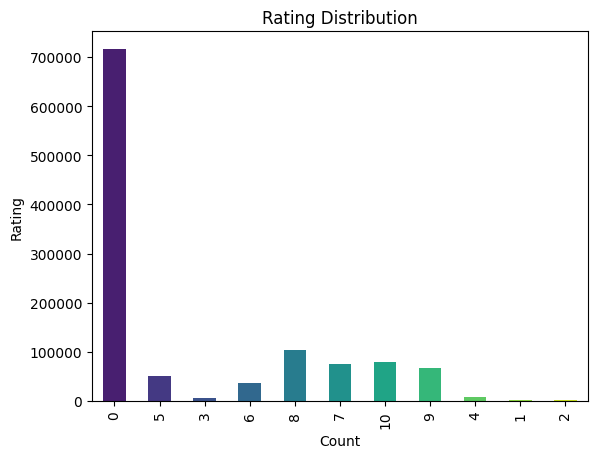

In [34]:
colors = sns.color_palette("viridis", len(ratings['Book-Rating'].unique()))
ratings['Book-Rating'].value_counts(sort=False).plot(kind='bar', color=colors) 
plt.xlabel('Count')
plt.ylabel('Rating')
plt.title('Rating Distribution')
plt.show()

Here, 0 ratings refers to implicit ratings which are automaticatically generated and not given by the users. Thus only explicit ratings which are not equal to 0 must be considered while making the recommender systems as implicit ratings are the most frequent in such kinds of datasets.

In [35]:
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]
#only those ratings should remain whose books are there 
ratings.shape, ratings_new.shape

((1149780, 3), (1017062, 3))

<Axes: xlabel='Book-Rating', ylabel='count'>

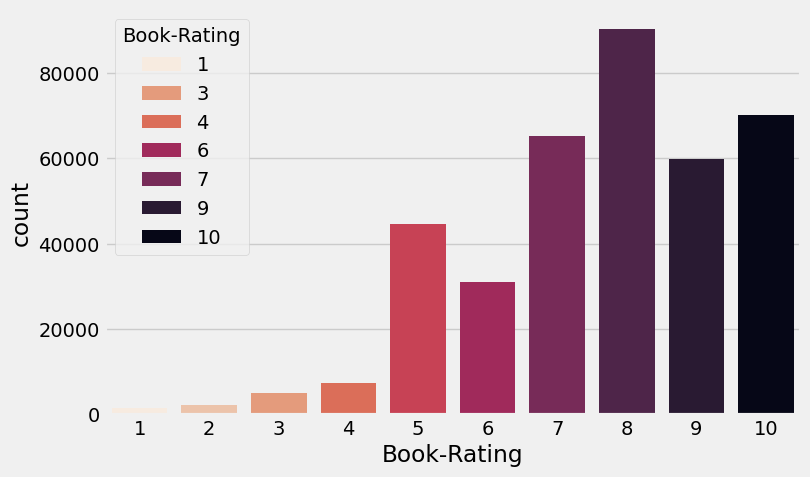

In [36]:
ratings_explicit = ratings_new[ratings_new['Book-Rating'] != 0]
ratings_implicit = ratings_new[ratings_new['Book-Rating'] == 0]

plt.style.use('fivethirtyeight')
plt.figure(figsize=(8, 5))
sns.countplot(data=ratings_explicit , x='Book-Rating', hue='Book-Rating', palette='rocket_r')

In [37]:
merged = pd.merge(ratings_new, books[['ISBN', 'Book-Title', 'Book-Author']], on='ISBN', how='inner')

In [38]:
merged.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose
1,276726,0155061224,5,Rites of Passage,Judith Rae
2,276727,0446520802,0,The Notebook,Nicholas Sparks
3,276729,052165615X,3,Help!: Level 1,Philip Prowse
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather


Text(0, 0.5, 'Title')

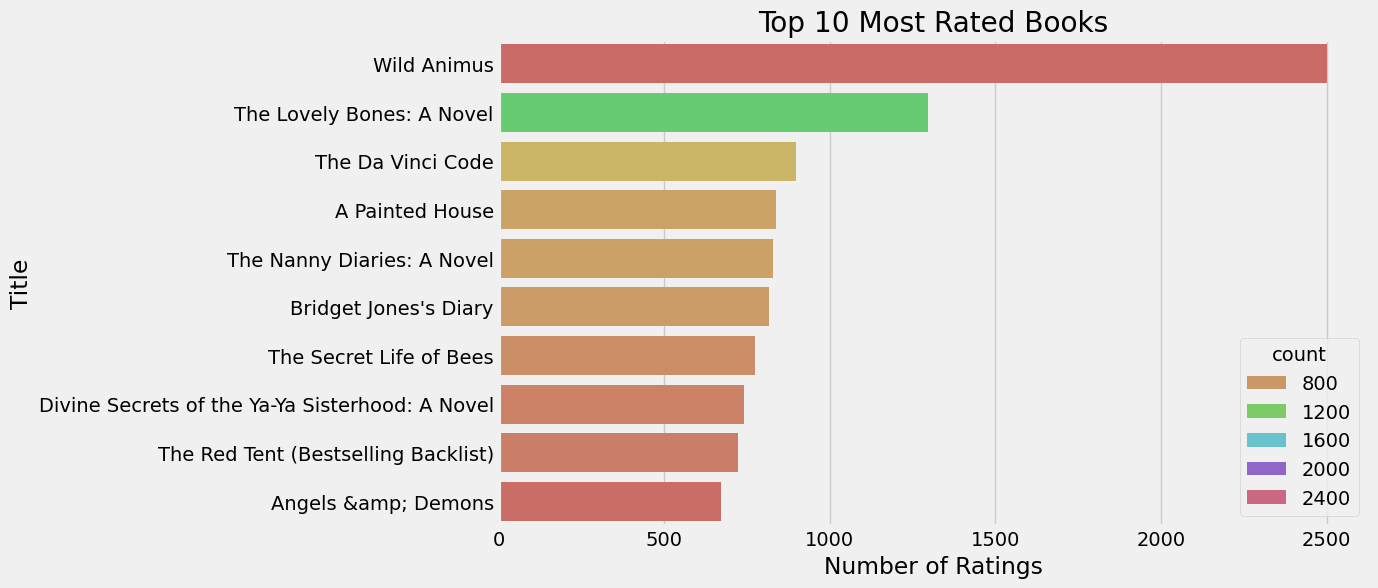

In [39]:
top_rated_books = merged['Book-Title'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))  
sns.barplot(x=top_rated_books, y=top_rated_books.index, hue =top_rated_books, palette='hls')
plt.title('Top 10 Most Rated Books')
plt.xlabel('Number of Ratings')
plt.ylabel('Title')

In [40]:
votes_per_book = merged.groupby('Book-Title')['User-ID'].count()
most_read_books = votes_per_book[votes_per_book > 500].index

In [41]:
average_ratings = merged.groupby('Book-Title')['Book-Rating'].mean()

In [42]:
average_ratings = average_ratings.loc[most_read_books]

Text(0, 0.5, 'Title')

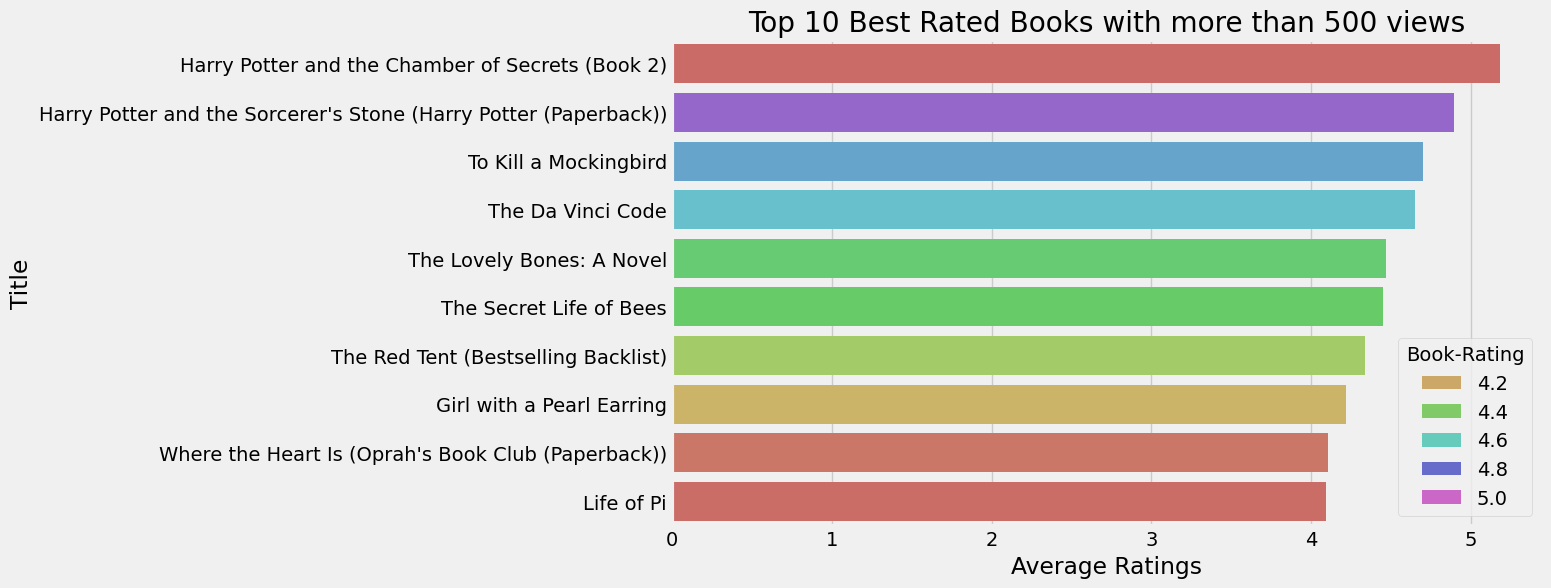

In [43]:
top_read_books = average_ratings.nlargest(10)
plt.figure(figsize=(10, 6))  
sns.barplot(x=top_read_books, y=top_read_books.index, hue =top_read_books, palette='hls')
plt.title('Top 10 Best Rated Books with more than 500 views')
plt.xlabel('Average Ratings')
plt.ylabel('Title')

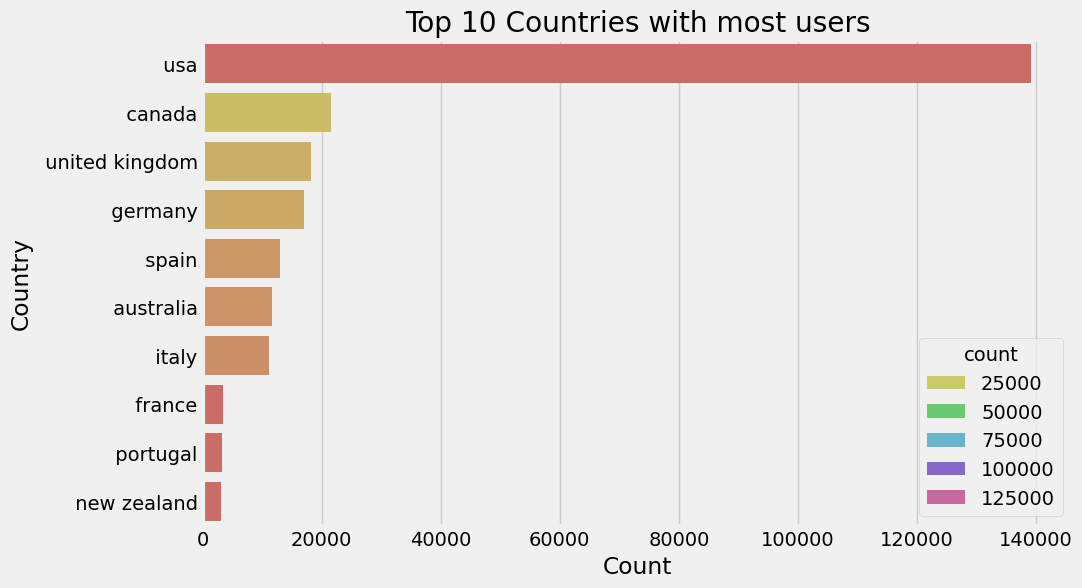

In [44]:
top_countries = users['Location'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))  
sns.barplot(x=top_countries, y=top_countries.index,hue=top_countries, palette='hls')
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Top 10 Countries with most users')
plt.show()

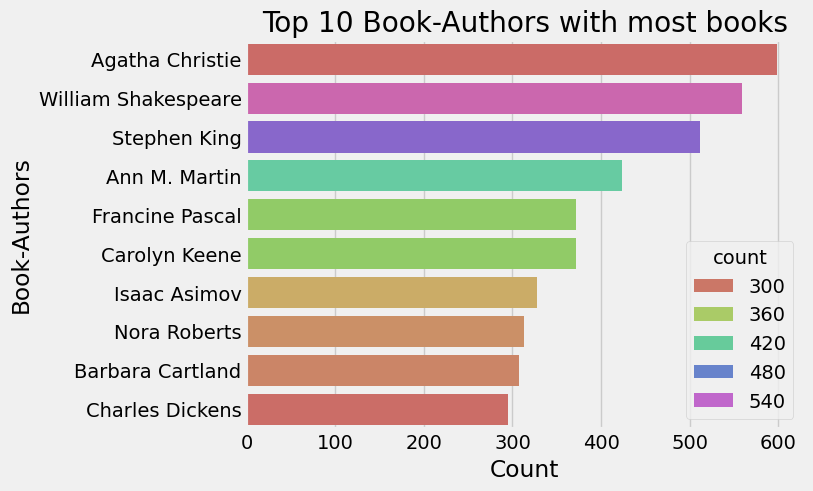

In [45]:
top_authors = books['Book-Author'].value_counts().nlargest(10)
sns.barplot(x=top_authors, y=top_authors.index ,hue=top_authors , palette='hls')
plt.xlabel('Count')
plt.ylabel('Book-Authors')
plt.title('Top 10 Book-Authors with most books')
plt.show()

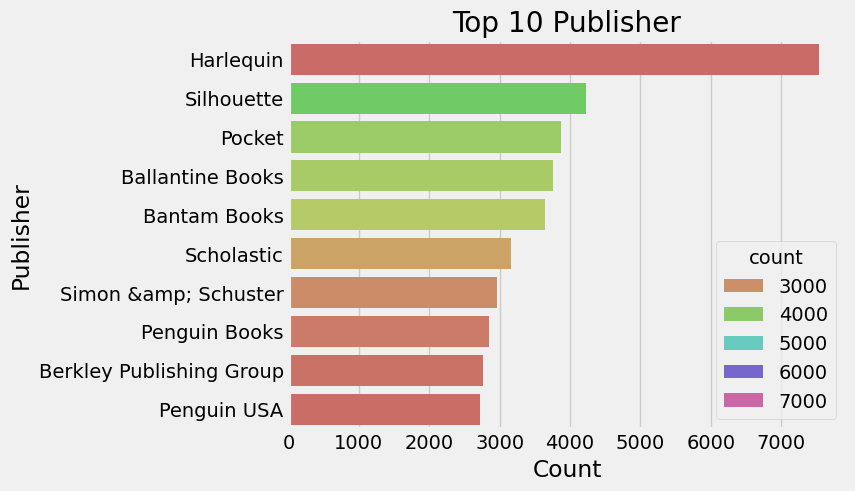

In [46]:
top_publisher = books['Publisher'].value_counts().nlargest(10)
sns.barplot(x=top_publisher, y=top_publisher.index,hue=top_publisher, palette='hls')
plt.xlabel('Count')
plt.ylabel('Publisher')
plt.title('Top 10 Publisher')
plt.show()